### Date: Tuesday, 26 November 2024

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
# load the dataset
df = pd.read_excel("E:\Post PhD Research\Supervision\BS\BEd-group\Analysis\edu-tech\combined_cleaned_file.xlsx")

In [3]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,role,age,gender,school_location,district,frequency_of_technology_use,perception_of_tech_support,benefits_of_technology,challenges_and_limitations,personalized_feedback_enhancement,student_resistance_to_technology,change_in_learning_and_engagement,motivation_to_learn,impact_on_social_skills_and_relationships,adequacy_for_students_with_disabilities,observed_changes_in_learning,support_for_essential_skills_development,promotion_of_independence_and_self_learning,increase_in_academic_performance,improvement_in_engagement_and_learning,challenges_in_digital_literacy,additional_technology_or_resources_needed,future_directions_and_possibilities,perceived_enhancement_of_learning,negative_effects_of_screen_time,positive_changes_in_collaboration_and_teamwork,decrease_in_traditional_teaching_methods,need_for_additional_teacher_training,perception_of_tech_support_semtiment,challenges_and_limitations_semtiment,change_in_learning_and_engagement_semtiment,impact_on_social_skills_and_relationships_semtiment,support_for_essential_skills_development_semtiment
0,Teacher,31,Female,Aliabad,Hunza,several times a week,NaN,NaN,NaN,Yes,No,NaN,Yes,NaN,No,Yes,NaN,Yes,Yes,Yes,Yes,NaN,NaN,slightly,Yes,No,No,Yes,Positive,Negative,Positive,Positive,Positive
1,Teacher,28,Female,Aliabad,Hunza,monthly,Technology can help teachers and students in e...,"Increase motivation, access to vast learning m...",Lack of teachnological literacy can cause bigg...,Yes,Yes,Technonlogy has drastically changed the proces...,Yes,Teacher role has become more modified in the d...,Yes,Yes,Various learning wibsites onlines quizes can h...,Yes,Yes,Yes,Yes,"Digiltal boards,LMS and IT labs with modern ga...",More tarning and digital literacy courses.,extremely,Yes,Yes,Yes,Yes,Positive,Negative,Positive,Positive,Positive
2,Teacher,30,Female,Aliabad,Hunza,several times a week,The use of technology during whole class inter...,Students develop crucial skills such as digita...,Technology in education can reduce face to fac...,Yes,No,Student can collabrate on group project using ...,Yes,The technology impact on our social skill its ...,Yes,Yes,"To improve your crtical thiking, you need to b...",Yes,Yes,Yes,No,Prepare student for the future we connect with...,Student can practice desnging prolem solving.,very,Yes,Yes,No,Yes,Positive,Negative,Negative,Positive,Negative
3,Teacher,35,Female,Aliabad,Hunza,several times a week,It captures the intrest of students which resu...,"It enhances listing, reading, writing and spea...","Interaption of internet, irrelevant data for y...",Yes,No,Technology change the way we learn about thing...,Yes,The technology impact is very easy to work qui...,Yes,No,As primary studets are not much eligible to ta...,No,Yes,Yes,No,"Chrom books, referance books.","AI, tablets and chrom book .",very,Yes,Yes,Yes,Yes,Positive,Negative,Positive,Positive,Negative
4,Teacher,33,Female,Aliabad,Hunza,weekly,Technology hepls kids better by giving them fu...,The most improtant benefits of using technolog...,using too much technology can distract kids no...,Yes,No,While using technolgy it helps enchance their ...,No,Too much tech can make us less caring and unde...,Yes,Yes,Technology can helps kids think creativly by u...,Yes,No,Yes,No,Interactive whiteboard and eductional apps can...,In the future technology will continue to inno...,very,No,No,No,Yes,Positive,Negative,Positive,Negative,Positive


In [5]:
df.shape

(118, 33)

# Preprocessing

### Adjusting the features/columns

In [10]:
df.columns

Index(['role', 'age', 'gender', 'school_location', 'district',
       'frequency_of_technology_use', 'perception_of_tech_support',
       'benefits_of_technology', 'challenges_and_limitations',
       'personalized_feedback_enhancement', 'student_resistance_to_technology',
       'change_in_learning_and_engagement', 'motivation_to_learn',
       'impact_on_social_skills_and_relationships',
       'adequacy_for_students_with_disabilities',
       'observed_changes_in_learning',
       'support_for_essential_skills_development',
       'promotion_of_independence_and_self_learning',
       'increase_in_academic_performance',
       'improvement_in_engagement_and_learning',
       'challenges_in_digital_literacy',
       'additional_technology_or_resources_needed',
       'future_directions_and_possibilities',
       'perceived_enhancement_of_learning', 'negative_effects_of_screen_time',
       'positive_changes_in_collaboration_and_teamwork',
       'decrease_in_traditional_teaching_metho

In [38]:
# Categorical variables
label_encoding = ['role', 'gender', 'personalized_feedback_enhancement', 'student_resistance_to_technology', 
                   'motivation_to_learn', 'adequacy_for_students_with_disabilities', 'observed_changes_in_learning', 
                   'promotion_of_independence_and_self_learning', 'increase_in_academic_performance', 
                   'improvement_in_engagement_and_learning', 'challenges_in_digital_literacy', 
                   'negative_effects_of_screen_time', 'positive_changes_in_collaboration_and_teamwork', 
                  'decrease_in_traditional_teaching_methods', 'need_for_additional_teacher_training'] + ['perception_of_tech_support_semtiment', 
                  'challenges_and_limitations_semtiment',
       'change_in_learning_and_engagement_semtiment', 'impact_on_social_skills_and_relationships_semtiment',
       'support_for_essential_skills_development_semtiment']

In [9]:
# Ordinal variables
ordinal_encoding = ['frequency_of_technology_use', 'perceived_enhancement_of_learning']

In [101]:
col_sentiment = ['perception_of_tech_support_semtiment', 'challenges_and_limitations_semtiment',
       'change_in_learning_and_engagement_semtiment', 'impact_on_social_skills_and_relationships_semtiment',
       'support_for_essential_skills_development_semtiment']

In [102]:
df[col_sentiment].isnull().sum()

perception_of_tech_support_semtiment                   0
challenges_and_limitations_semtiment                   0
change_in_learning_and_engagement_semtiment            0
impact_on_social_skills_and_relationships_semtiment    0
support_for_essential_skills_development_semtiment     0
dtype: int64

In [39]:
# Define the features
features = label_encoding + ordinal_encoding # + col_sentiment

In [40]:
len(features)

22

In [14]:
# Define the target variable
target_variable = 'improvement_in_engagement_and_learning'

In [41]:
df[target_variable].value_counts()

improvement_in_engagement_and_learning
1    104
0     14
Name: count, dtype: int64

In [20]:
# Bootstrapping to increase dataset size
augmented_data_bootstrap = df.sample(n=500, replace=True, random_state=42)

# Verify size of the augmented dataset
print(f"Original size: {len(df)}, Bootstrapped size: {len(augmented_data_bootstrap)}")

# Save or inspect the augmented dataset
augmented_data_bootstrap.to_csv("augmented_data_bootstrap.csv", index=False)

Original size: 118, Bootstrapped size: 500


In [22]:
augmented_data_bootstrap.shape

(500, 33)

### Feature Relationships

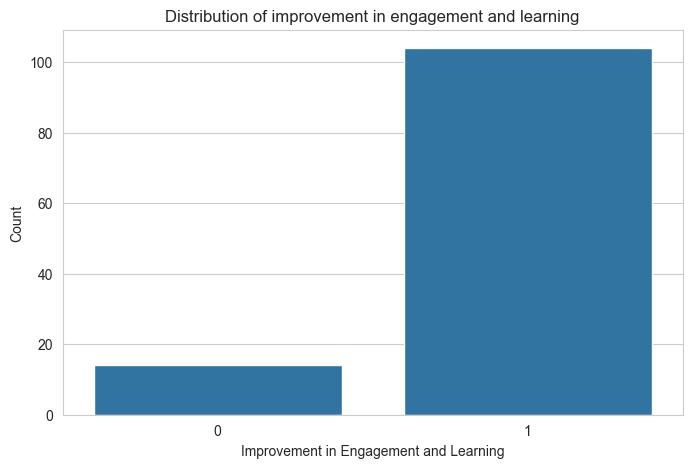

In [42]:
# plot the distribution of the target variable 'improvement_in_engagement_and_learning'
plt.figure(figsize=(8, 5))
sns.countplot(x='improvement_in_engagement_and_learning', data=df)
plt.title('Distribution of improvement in engagement and learning')
plt.xlabel('Improvement in Engagement and Learning')
plt.ylabel('Count')
plt.show()

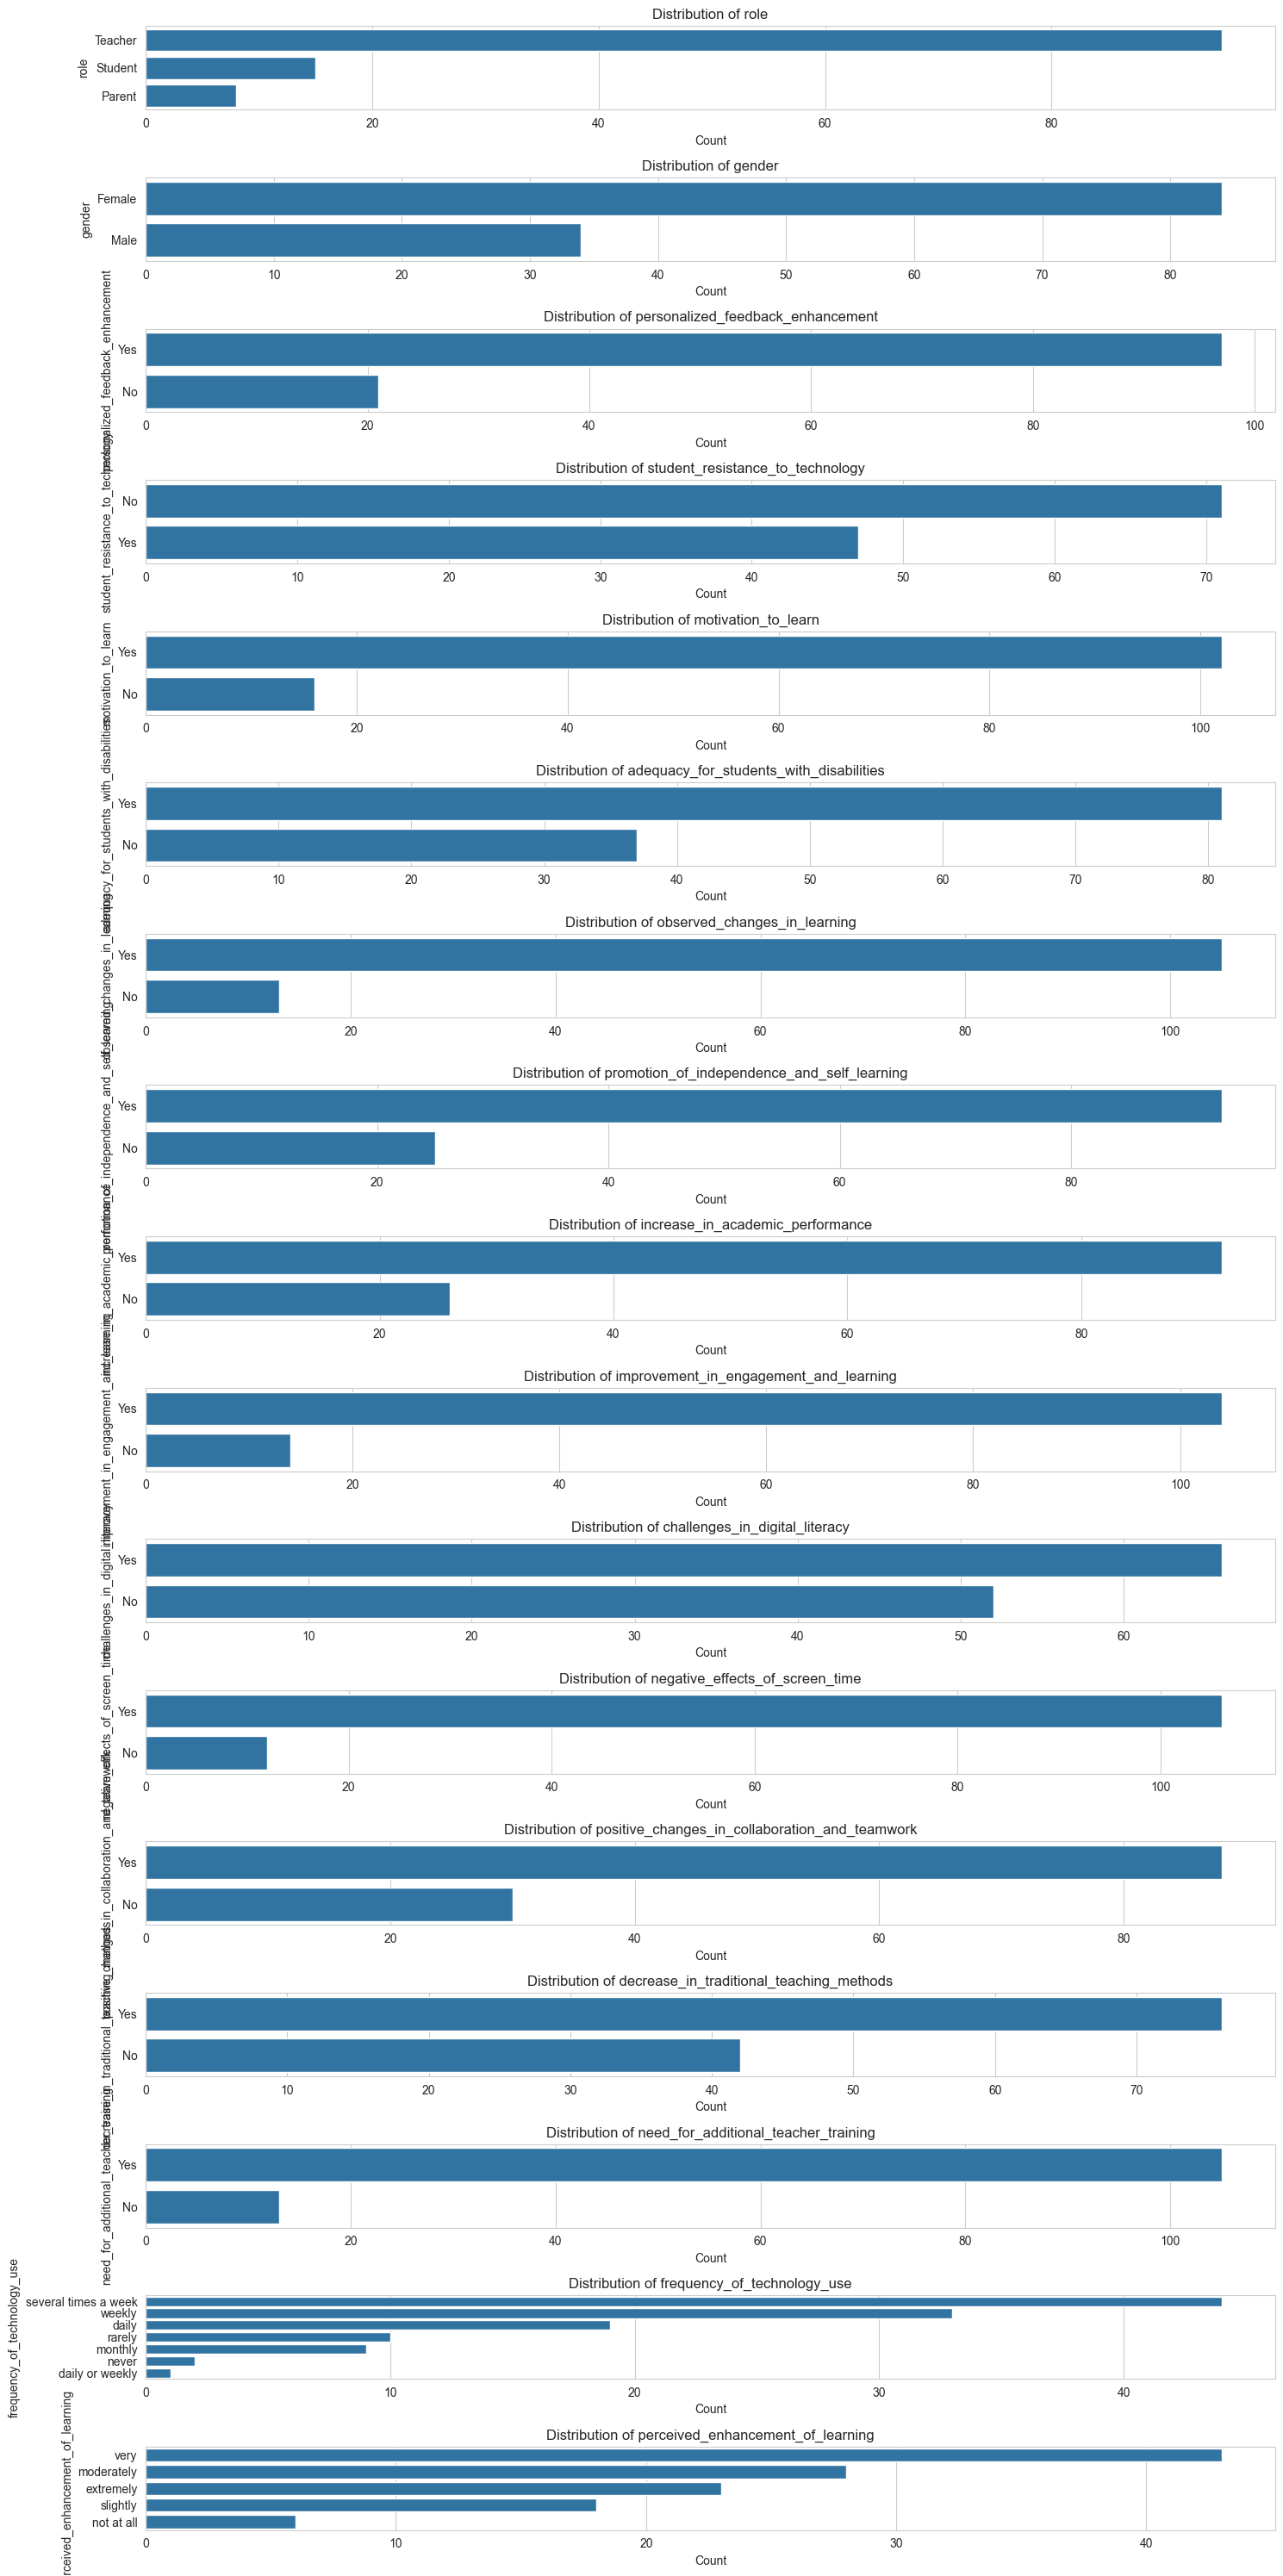

In [31]:
# plotting distributions of categorical features
plt.figure(figsize=(15, 30))
for i, column in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    sns.countplot(y=column, data=df, order = df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

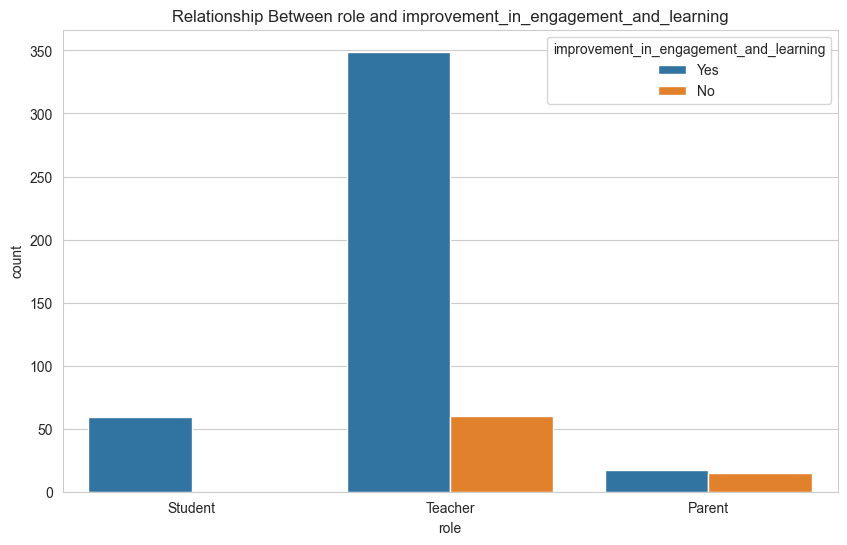

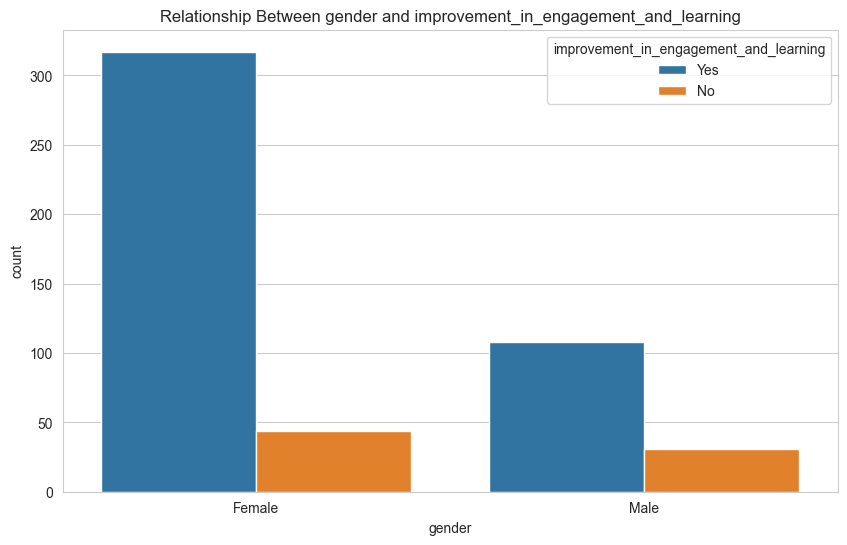

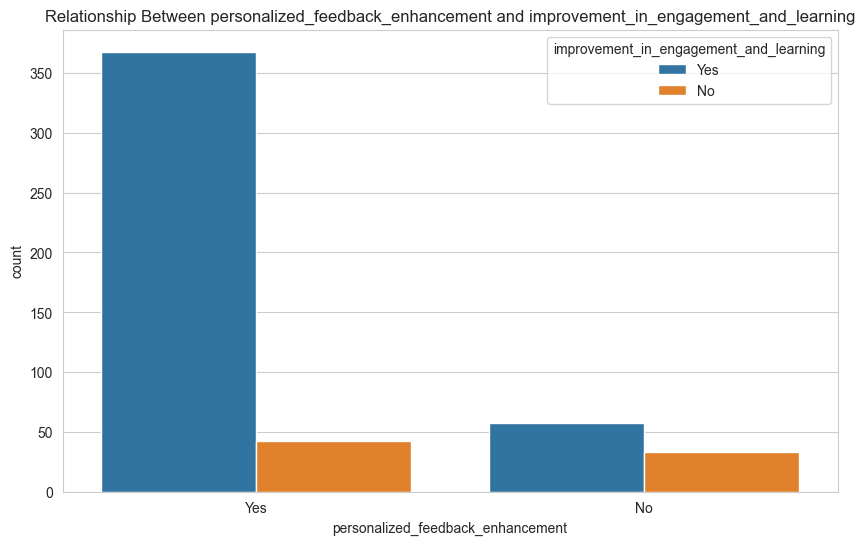

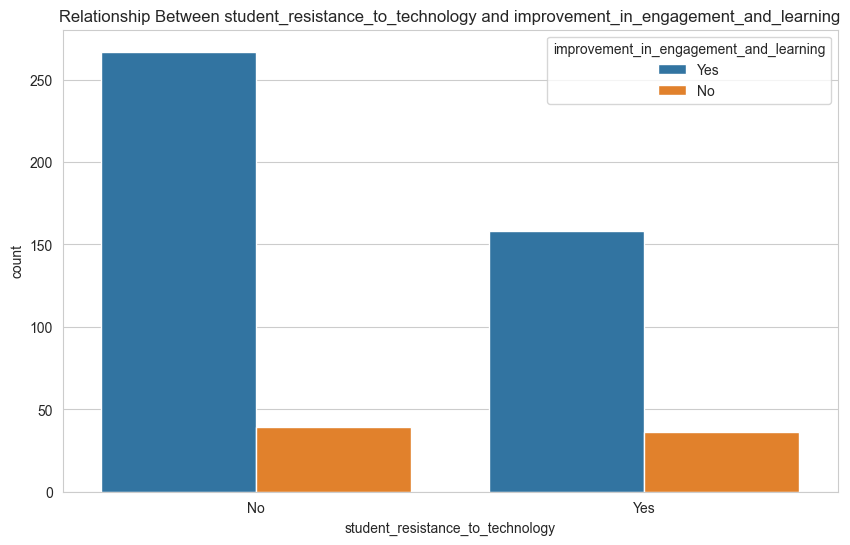

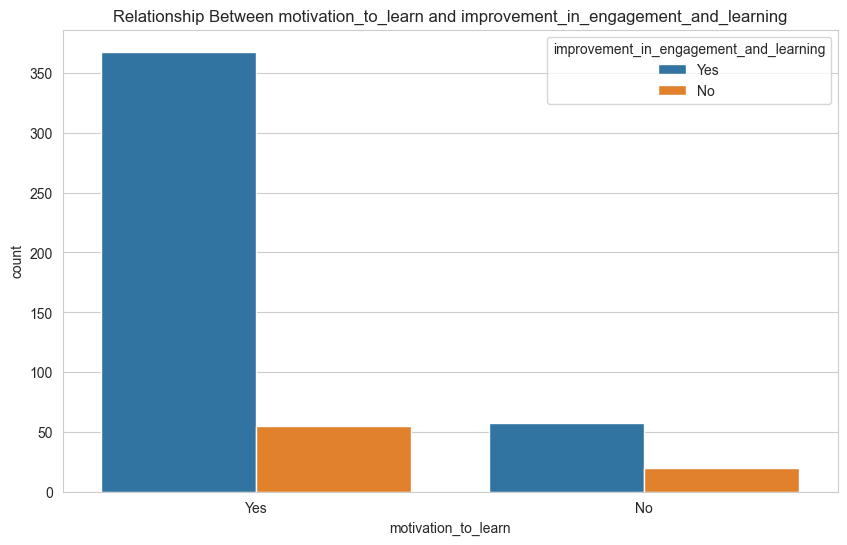

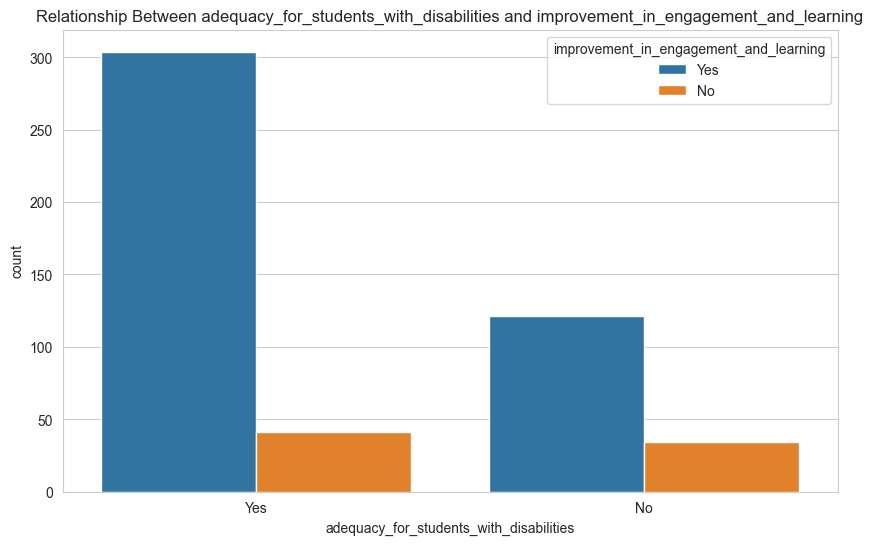

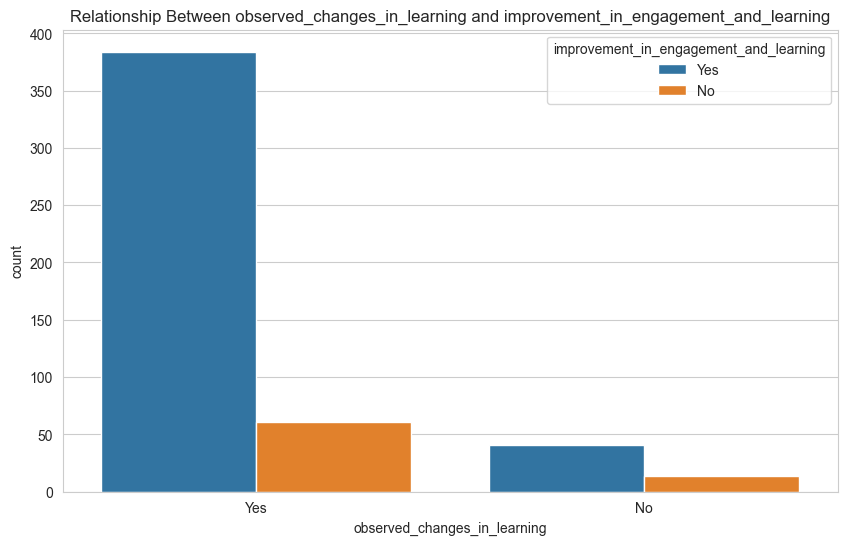

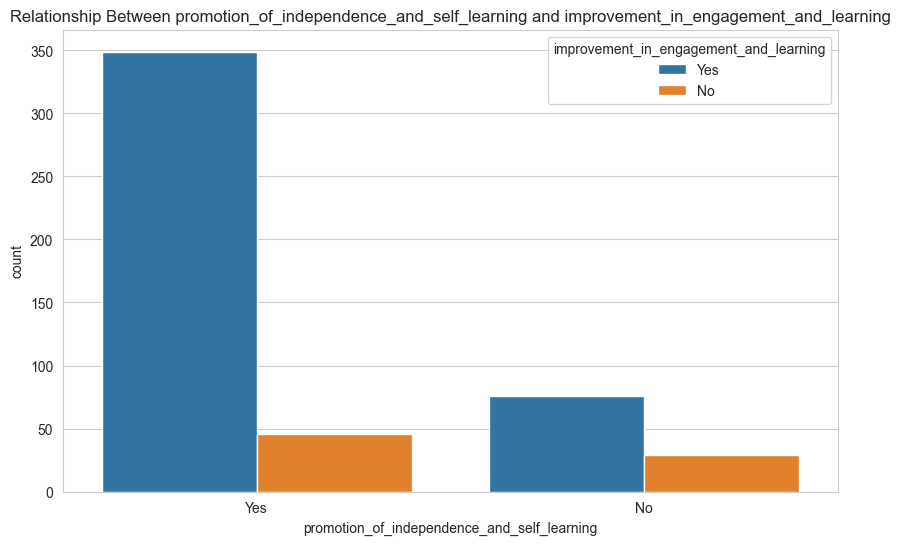

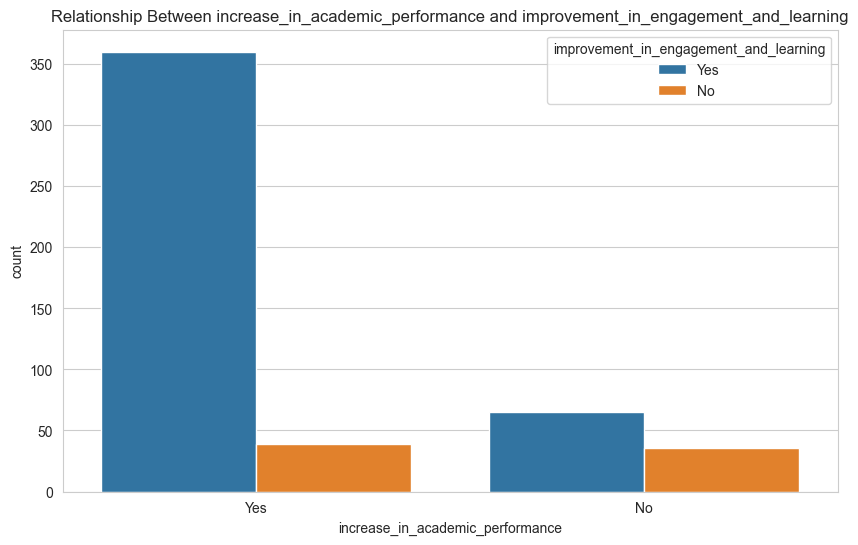

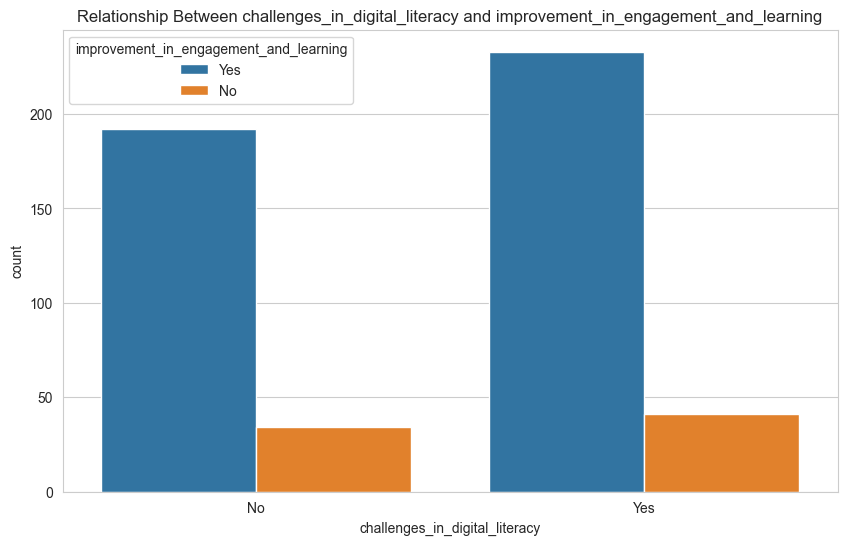

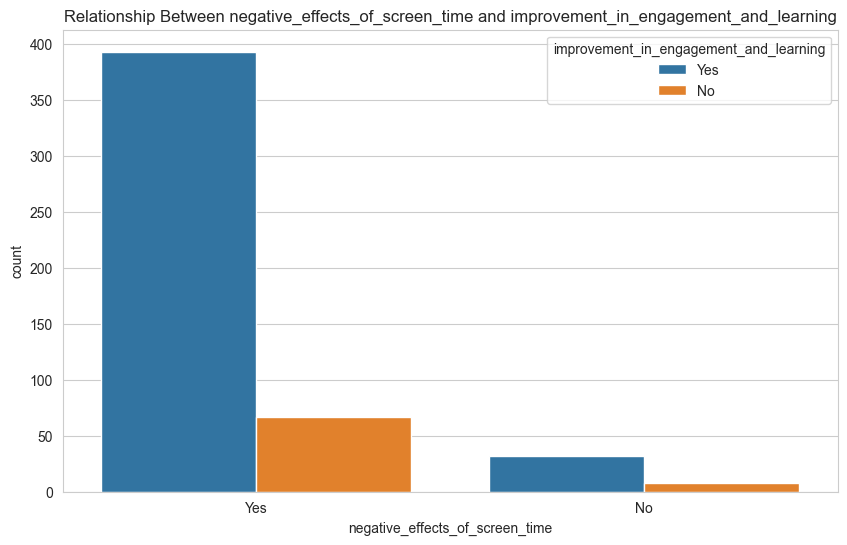

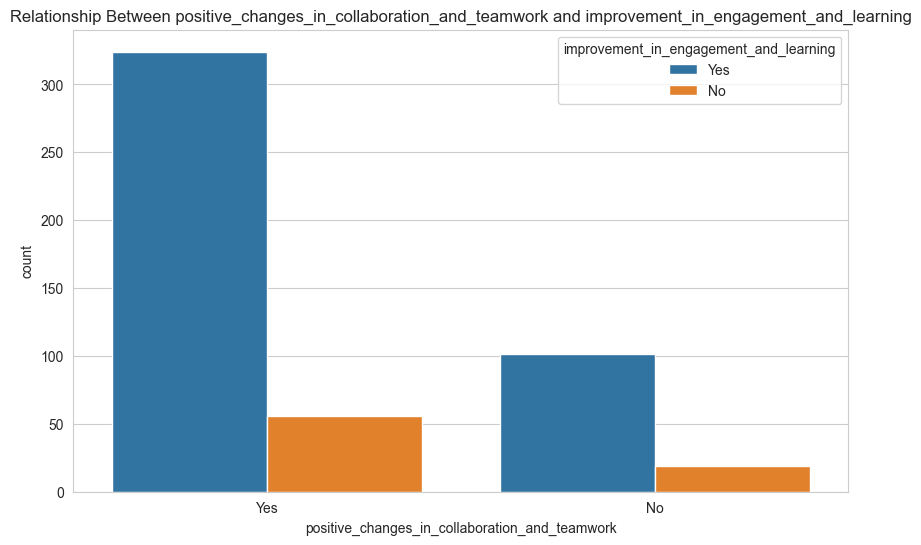

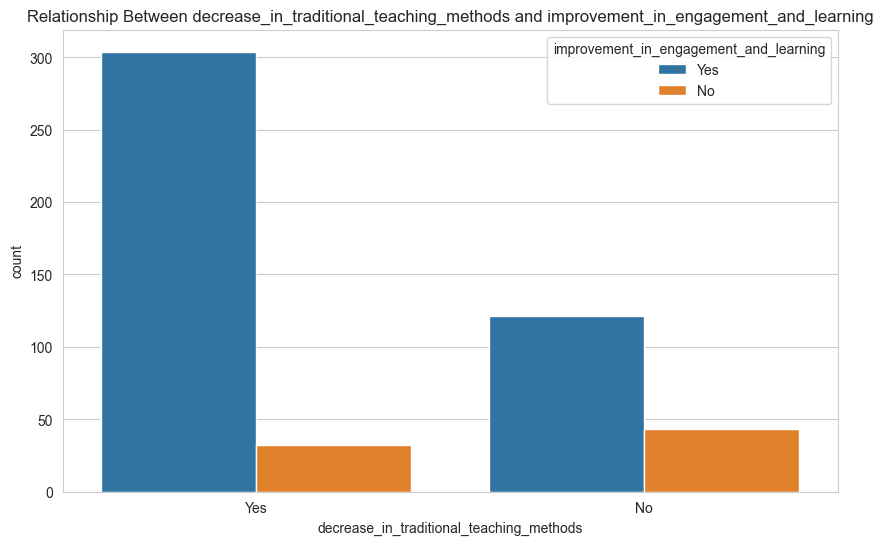

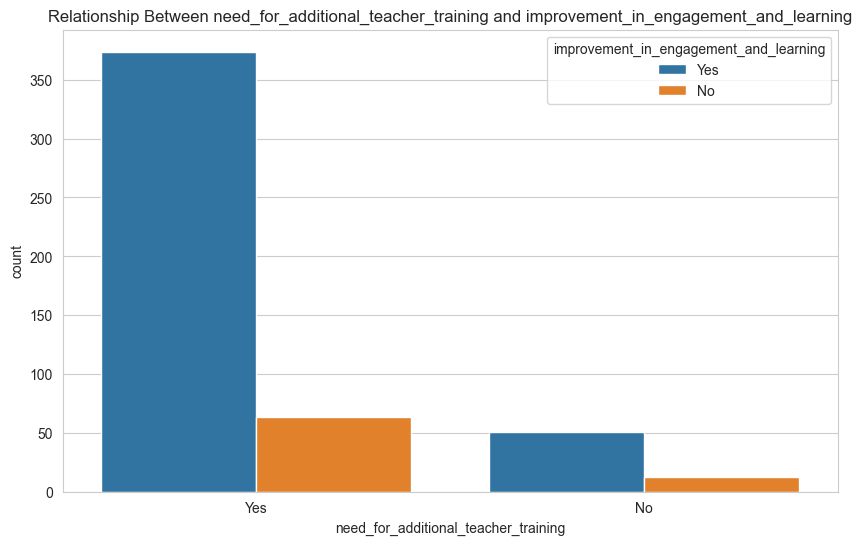

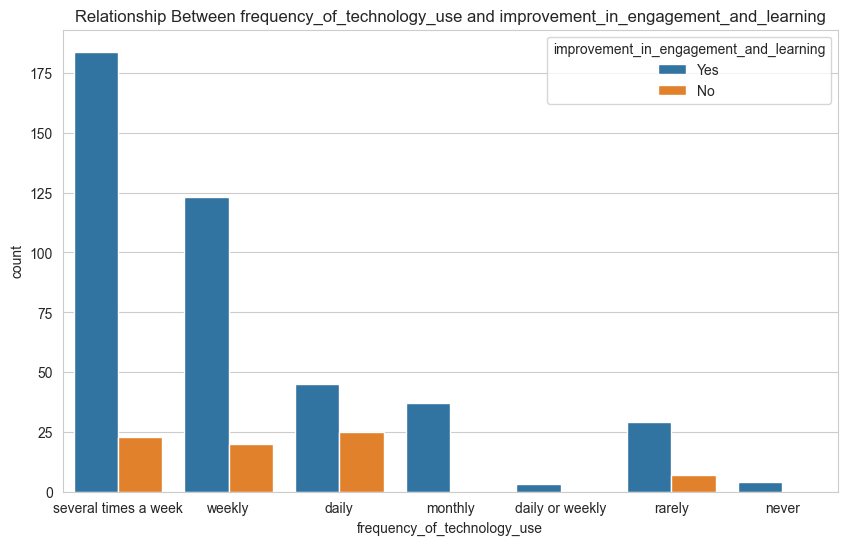

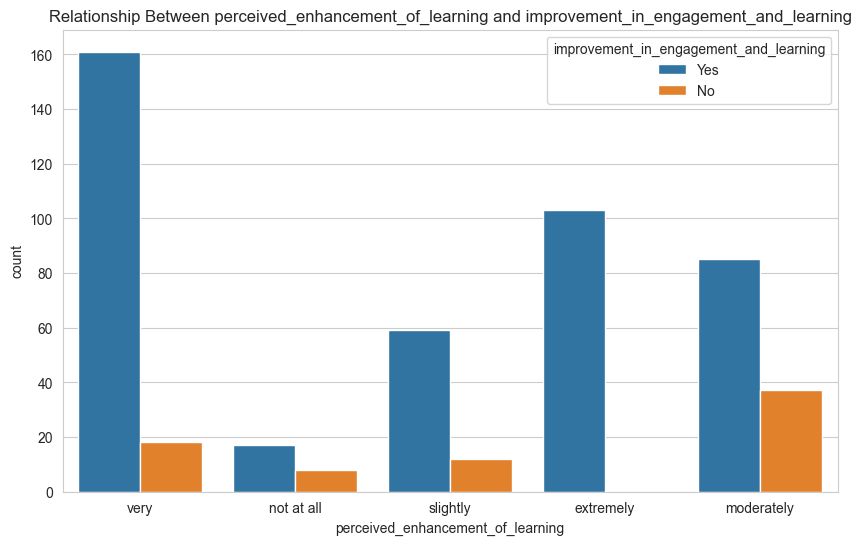

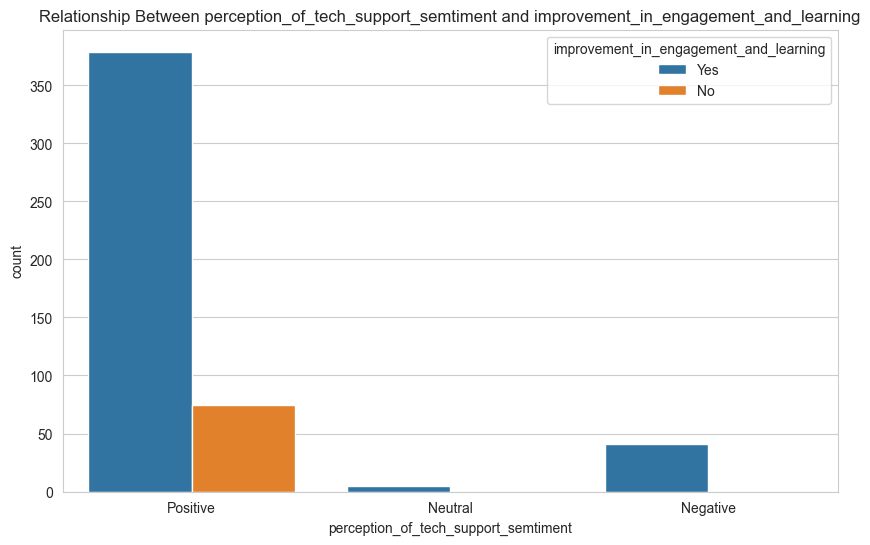

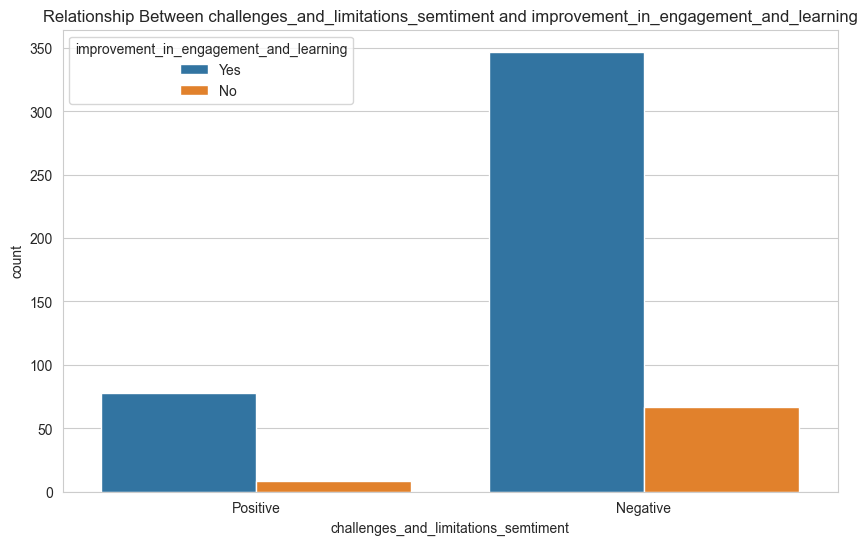

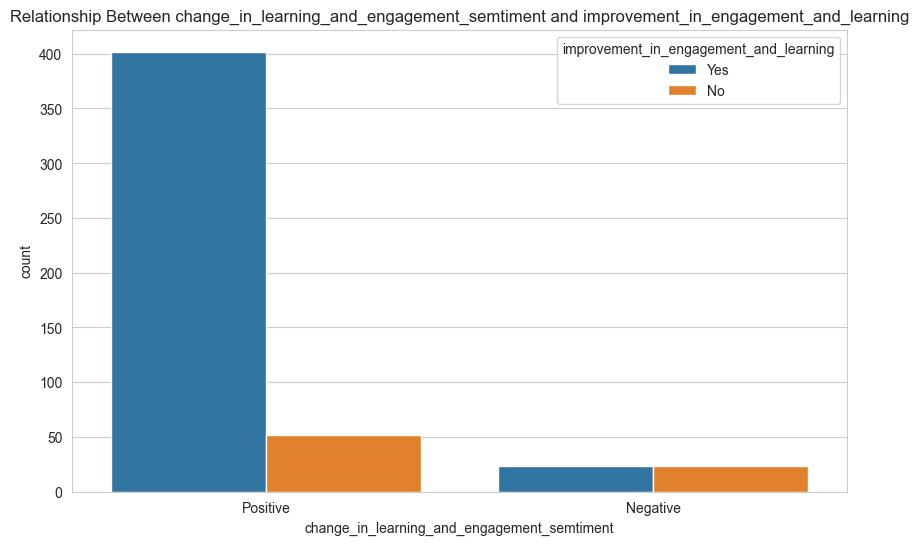

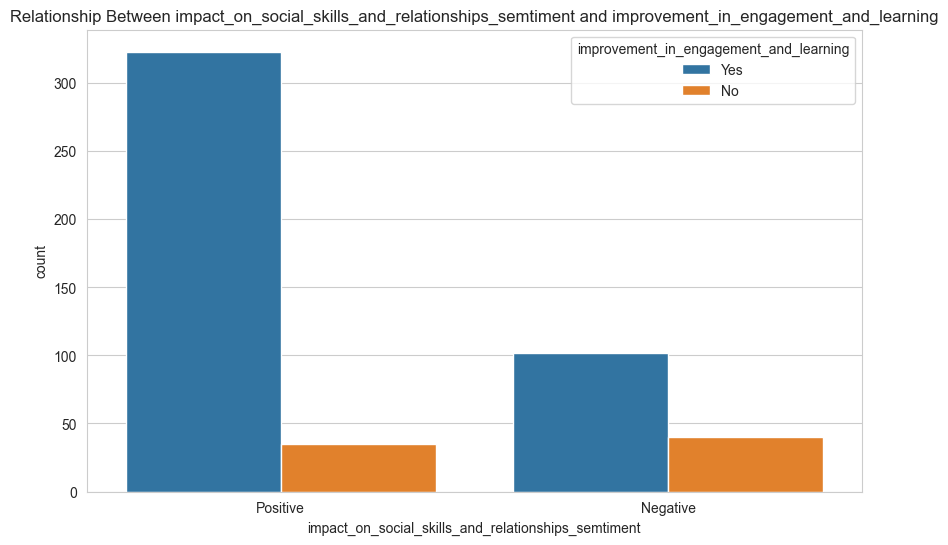

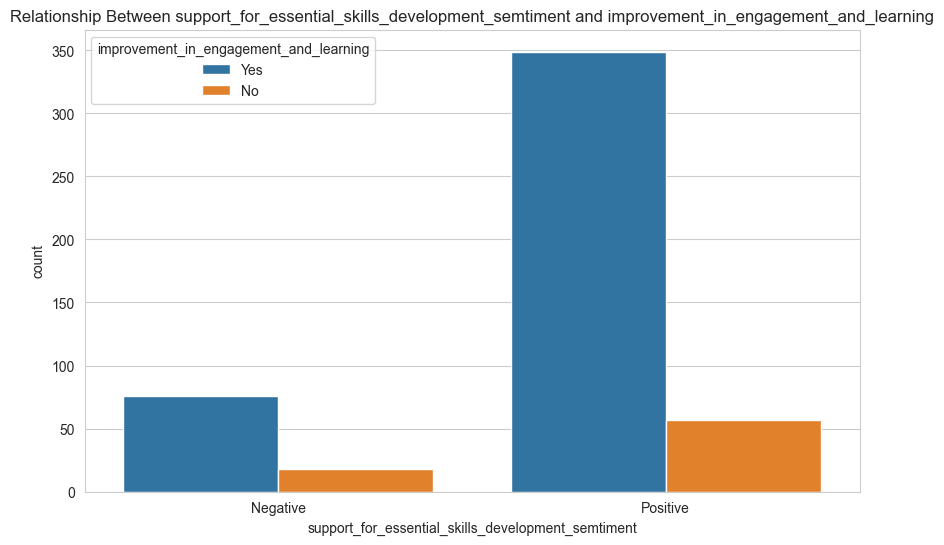

In [ ]:
# Analyze relationships between target variable and other features
# categorical_cols = df.select_dtypes(include=['object']).columns
for col in features:
    if col != target_variable:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=col, hue=target_variable)
        plt.title(f"Relationship Between {col} and {target_variable}")
        # plt.xticks(rotation=45)
        plt.show()

In [30]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler

In [44]:
# Encoding categorical variables
for col in label_encoding:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [43]:
label_encoding

['role',
 'gender',
 'personalized_feedback_enhancement',
 'student_resistance_to_technology',
 'motivation_to_learn',
 'adequacy_for_students_with_disabilities',
 'observed_changes_in_learning',
 'promotion_of_independence_and_self_learning',
 'increase_in_academic_performance',
 'improvement_in_engagement_and_learning',
 'challenges_in_digital_literacy',
 'negative_effects_of_screen_time',
 'positive_changes_in_collaboration_and_teamwork',
 'decrease_in_traditional_teaching_methods',
 'need_for_additional_teacher_training',
 'perception_of_tech_support_semtiment',
 'challenges_and_limitations_semtiment',
 'change_in_learning_and_engagement_semtiment',
 'impact_on_social_skills_and_relationships_semtiment',
 'support_for_essential_skills_development_semtiment']

In [45]:
# Define the order of the categories from lowest to highest
frequency_order = ['never', 'rarely', 'monthly', 'weekly', 'daily or weekly', 'several times a week', 'daily']

# Create the OrdinalEncoder and pass the defined category order
ordinal_encoder0 = OrdinalEncoder(categories=[frequency_order])

# Apply the ordinal encoding
df['frequency_of_technology_use_encoded'] = ordinal_encoder0.fit_transform(df[['frequency_of_technology_use']])

In [46]:
# Define the order of the categories from lowest to highest
learning_order = ['not at all', 'slightly', 'moderately', 'very', 'extremely']

# Create the OrdinalEncoder and pass the defined category order
ordinal_encoder1 = OrdinalEncoder(categories=[learning_order])  # 

# Apply the ordinal encoding
df['perceived_enhancement_of_learning_encoded'] = ordinal_encoder1.fit_transform(df[['perceived_enhancement_of_learning']])

In [47]:
df[['frequency_of_technology_use', 'frequency_of_technology_use_encoded']].head()

,frequency_of_technology_use,frequency_of_technology_use_encoded
0,several times a week,5.0
1,monthly,2.0
2,several times a week,5.0
3,several times a week,5.0
4,weekly,3.0


In [48]:
df[['perceived_enhancement_of_learning', 'perceived_enhancement_of_learning_encoded']].head()

,perceived_enhancement_of_learning,perceived_enhancement_of_learning_encoded
0,slightly,1.0
1,extremely,4.0
2,very,3.0
3,very,3.0
4,very,3.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 35 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   role                                                 118 non-null    int32  
 1   age                                                  118 non-null    int64  
 2   gender                                               118 non-null    int32  
 3   school_location                                      118 non-null    object 
 4   district                                             116 non-null    object 
 5   frequency_of_technology_use                          118 non-null    object 
 6   perception_of_tech_support                           88 non-null     object 
 7   benefits_of_technology                               101 non-null    object 
 8   challenges_and_limitations                           88 non-null     o

In [49]:
# Define the features
features_encoded = label_encoding + ['frequency_of_technology_use_encoded', 'perceived_enhancement_of_learning_encoded']

In [51]:
df[features_encoded]

,role,gender,personalized_feedback_enhancement,student_resistance_to_technology,motivation_to_learn,adequacy_for_students_with_disabilities,observed_changes_in_learning,promotion_of_independence_and_self_learning,increase_in_academic_performance,improvement_in_engagement_and_learning,challenges_in_digital_literacy,negative_effects_of_screen_time,positive_changes_in_collaboration_and_teamwork,decrease_in_traditional_teaching_methods,need_for_additional_teacher_training,perception_of_tech_support_semtiment,challenges_and_limitations_semtiment,change_in_learning_and_engagement_semtiment,impact_on_social_skills_and_relationships_semtiment,support_for_essential_skills_development_semtiment,frequency_of_technology_use_encoded,perceived_enhancement_of_learning_encoded
0,2,0,1,0,1,0,1,1,1,1,1,1,0,0,1,2,0,1,1,1,5.0,1.0
1,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,0,1,1,1,2.0,4.0
2,2,0,1,0,1,1,1,1,1,1,0,1,1,0,1,2,0,0,1,0,5.0,3.0
3,2,0,1,0,1,1,0,0,1,1,0,1,1,1,1,2,0,1,1,0,5.0,3.0
4,2,0,1,0,0,1,1,1,0,1,0,0,0,0,1,2,0,1,0,1,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2,0,0,0,1,1,1,1,1,1,0,1,1,1,1,2,0,1,0,1,0.0,3.0
114,2,1,0,0,1,0,1,1,1,1,0,0,0,1,1,2,0,1,1,0,5.0,1.0
115,2,0,0,0,0,0,1,0,0,1,0,1,0,1,0,2,1,1,0,1,6.0,4.0
116,2,1,1,1,1,1,1,1,0,1,0,1,1,1,1,2,0,1,0,1,5.0,3.0


In [55]:
df[features_encoded].drop('improvement_in_engagement_and_learning', axis=1).head()

,role,gender,personalized_feedback_enhancement,student_resistance_to_technology,motivation_to_learn,adequacy_for_students_with_disabilities,observed_changes_in_learning,promotion_of_independence_and_self_learning,increase_in_academic_performance,challenges_in_digital_literacy,negative_effects_of_screen_time,positive_changes_in_collaboration_and_teamwork,decrease_in_traditional_teaching_methods,need_for_additional_teacher_training,perception_of_tech_support_semtiment,challenges_and_limitations_semtiment,change_in_learning_and_engagement_semtiment,impact_on_social_skills_and_relationships_semtiment,support_for_essential_skills_development_semtiment,frequency_of_technology_use_encoded,perceived_enhancement_of_learning_encoded
0,2,0,1,0,1,0,1,1,1,1,1,0,0,1,2,0,1,1,1,5.0,1.0
1,2,0,1,1,1,1,1,1,1,1,1,1,1,1,2,0,1,1,1,2.0,4.0
2,2,0,1,0,1,1,1,1,1,0,1,1,0,1,2,0,0,1,0,5.0,3.0
3,2,0,1,0,1,1,0,0,1,0,1,1,1,1,2,0,1,1,0,5.0,3.0
4,2,0,1,0,0,1,1,1,0,0,0,0,0,1,2,0,1,0,1,3.0,3.0


In [52]:
df[features_encoded].isnull().sum()

role                                                   0
gender                                                 0
personalized_feedback_enhancement                      0
student_resistance_to_technology                       0
motivation_to_learn                                    0
adequacy_for_students_with_disabilities                0
observed_changes_in_learning                           0
promotion_of_independence_and_self_learning            0
increase_in_academic_performance                       0
improvement_in_engagement_and_learning                 0
challenges_in_digital_literacy                         0
negative_effects_of_screen_time                        0
positive_changes_in_collaboration_and_teamwork         0
decrease_in_traditional_teaching_methods               0
need_for_additional_teacher_training                   0
perception_of_tech_support_semtiment                   0
challenges_and_limitations_semtiment                   0
change_in_learning_and_engageme

In [53]:
df[features_encoded].shape

(118, 22)

In [54]:
df[features].head()

,role,gender,personalized_feedback_enhancement,student_resistance_to_technology,motivation_to_learn,adequacy_for_students_with_disabilities,observed_changes_in_learning,promotion_of_independence_and_self_learning,increase_in_academic_performance,improvement_in_engagement_and_learning,challenges_in_digital_literacy,negative_effects_of_screen_time,positive_changes_in_collaboration_and_teamwork,decrease_in_traditional_teaching_methods,need_for_additional_teacher_training,perception_of_tech_support_semtiment,challenges_and_limitations_semtiment,change_in_learning_and_engagement_semtiment,impact_on_social_skills_and_relationships_semtiment,support_for_essential_skills_development_semtiment,frequency_of_technology_use,perceived_enhancement_of_learning
0,2,0,1,0,1,0,1,1,1,1,1,1,0,0,1,2,0,1,1,1,several times a week,slightly
1,2,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,0,1,1,1,monthly,extremely
2,2,0,1,0,1,1,1,1,1,1,0,1,1,0,1,2,0,0,1,0,several times a week,very
3,2,0,1,0,1,1,0,0,1,1,0,1,1,1,1,2,0,1,1,0,several times a week,very
4,2,0,1,0,0,1,1,1,0,1,0,0,0,0,1,2,0,1,0,1,weekly,very


### Handling Class Imbalance
The next step is to balance the dataset using oversampling to handle the class imbalance observed in the claim_status. Let’s proceed with balancing the classes:

In [56]:
from sklearn.utils import resample

In [52]:
df[target_variable].head()

0    1
1    1
2    1
3    1
4    1
Name: improvement_in_engagement_and_learning, dtype: int32

In [57]:
# separate majority and minority classes
majority = df[df.improvement_in_engagement_and_learning == 1]
minority = df[df.improvement_in_engagement_and_learning == 0]

In [55]:
len(majority)

104

In [58]:
# oversample the minority class
minority_oversampled = resample(minority,
                                replace=True,
                                n_samples=len(majority),
                                random_state=42)

In [59]:
# combine majority class with oversampled minority class
oversampled_data = pd.concat([majority, minority_oversampled])

In [60]:
# check the distribution of undersampled and oversampled datasets
oversampled_distribution = oversampled_data.improvement_in_engagement_and_learning.value_counts()

In [61]:
oversampled_distribution

improvement_in_engagement_and_learning
1    104
0    104
Name: count, dtype: int64

# Model Training
The next step is to build a predictive model using the oversampled data. Given the nature of the task (binary classification), a suitable algorithm could be logistic regression, random forest, or gradient boosting. Considering the effectiveness of random forests in handling both numerical and categorical data and their ability to model complex interactions, we’ll proceed with a Random Forest classifier:

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
df[features].drop('improvement_in_engagement_and_learning', axis=1).head()

,role,gender,personalized_feedback_enhancement,student_resistance_to_technology,motivation_to_learn,adequacy_for_students_with_disabilities,observed_changes_in_learning,promotion_of_independence_and_self_learning,increase_in_academic_performance,challenges_in_digital_literacy,negative_effects_of_screen_time,positive_changes_in_collaboration_and_teamwork,decrease_in_traditional_teaching_methods,need_for_additional_teacher_training,frequency_of_technology_use_encoded,perceived_enhancement_of_learning_encoded
0,2,0,1,0,1,0,1,1,1,1,1,0,0,1,5.0,1.0
1,2,0,1,1,1,1,1,1,1,1,1,1,1,1,2.0,4.0
2,2,0,1,0,1,1,1,1,1,0,1,1,0,1,5.0,3.0
3,2,0,1,0,1,1,0,0,1,0,1,1,1,1,5.0,3.0
4,2,0,1,0,0,1,1,1,0,0,0,0,0,1,3.0,3.0


In [63]:
# separate features and target variable
X = df[features_encoded].drop(target_variable, axis=1)
y = df[target_variable]

In [64]:
X == df[features_encoded].drop('improvement_in_engagement_and_learning', axis=1)

,role,gender,personalized_feedback_enhancement,student_resistance_to_technology,motivation_to_learn,adequacy_for_students_with_disabilities,observed_changes_in_learning,promotion_of_independence_and_self_learning,increase_in_academic_performance,challenges_in_digital_literacy,negative_effects_of_screen_time,positive_changes_in_collaboration_and_teamwork,decrease_in_traditional_teaching_methods,need_for_additional_teacher_training,perception_of_tech_support_semtiment,challenges_and_limitations_semtiment,change_in_learning_and_engagement_semtiment,impact_on_social_skills_and_relationships_semtiment,support_for_essential_skills_development_semtiment,frequency_of_technology_use_encoded,perceived_enhancement_of_learning_encoded
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
114,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
115,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
116,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# # create a random forest classifier model
# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X, y)

In [70]:
# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
# create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [74]:
# predictions
y_pred = rf_model.predict(X_test)

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.78      1.00      0.88        28

    accuracy                           0.78        36
   macro avg       0.39      0.50      0.44        36
weighted avg       0.60      0.78      0.68        36



e:\Post PhD Research\Supervision\BS\BEd-group\Analysis\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Post PhD Research\Supervision\BS\BEd-group\Analysis\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Post PhD Research\Supervision\BS\BEd-group\Analysis\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [66]:
# get feature importance
feature_importance = rf_model.feature_importances_

In [67]:
# create a dataframe for visualization of feature importance
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

In [76]:
features_df.head(10)

,Feature,Importance
19,frequency_of_technology_use_encoded,0.110567
2,personalized_feedback_enhancement,0.091637
8,increase_in_academic_performance,0.071678
20,perceived_enhancement_of_learning_encoded,0.071449
16,change_in_learning_and_engagement_semtiment,0.063854
11,positive_changes_in_collaboration_and_teamwork,0.055578
12,decrease_in_traditional_teaching_methods,0.052956
1,gender,0.051164
15,challenges_and_limitations_semtiment,0.045608
17,impact_on_social_skills_and_relationships_semt...,0.043015


In [77]:
oversampled_data.head()

,role,age,gender,school_location,district,frequency_of_technology_use,perception_of_tech_support,benefits_of_technology,challenges_and_limitations,personalized_feedback_enhancement,student_resistance_to_technology,change_in_learning_and_engagement,motivation_to_learn,impact_on_social_skills_and_relationships,adequacy_for_students_with_disabilities,observed_changes_in_learning,support_for_essential_skills_development,promotion_of_independence_and_self_learning,increase_in_academic_performance,improvement_in_engagement_and_learning,challenges_in_digital_literacy,additional_technology_or_resources_needed,future_directions_and_possibilities,perceived_enhancement_of_learning,negative_effects_of_screen_time,positive_changes_in_collaboration_and_teamwork,decrease_in_traditional_teaching_methods,need_for_additional_teacher_training,perception_of_tech_support_semtiment,challenges_and_limitations_semtiment,change_in_learning_and_engagement_semtiment,impact_on_social_skills_and_relationships_semtiment,support_for_essential_skills_development_semtiment,frequency_of_technology_use_encoded,perceived_enhancement_of_learning_encoded
0,2,31,0,Aliabad,Hunza,several times a week,NaN,NaN,NaN,1,0,NaN,1,NaN,0,1,NaN,1,1,1,1,NaN,NaN,slightly,1,0,0,1,2,0,1,1,1,5.0,1.0
1,2,28,0,Aliabad,Hunza,monthly,Technology can help teachers and students in e...,"Increase motivation, access to vast learning m...",Lack of teachnological literacy can cause bigg...,1,1,Technonlogy has drastically changed the proces...,1,Teacher role has become more modified in the d...,1,1,Various learning wibsites onlines quizes can h...,1,1,1,1,"Digiltal boards,LMS and IT labs with modern ga...",More tarning and digital literacy courses.,extremely,1,1,1,1,2,0,1,1,1,2.0,4.0
2,2,30,0,Aliabad,Hunza,several times a week,The use of technology during whole class inter...,Students develop crucial skills such as digita...,Technology in education can reduce face to fac...,1,0,Student can collabrate on group project using ...,1,The technology impact on our social skill its ...,1,1,"To improve your crtical thiking, you need to b...",1,1,1,0,Prepare student for the future we connect with...,Student can practice desnging prolem solving.,very,1,1,0,1,2,0,0,1,0,5.0,3.0
3,2,35,0,Aliabad,Hunza,several times a week,It captures the intrest of students which resu...,"It enhances listing, reading, writing and spea...","Interaption of internet, irrelevant data for y...",1,0,Technology change the way we learn about thing...,1,The technology impact is very easy to work qui...,1,0,As primary studets are not much eligible to ta...,0,1,1,0,"Chrom books, referance books.","AI, tablets and chrom book .",very,1,1,1,1,2,0,1,1,0,5.0,3.0
4,2,33,0,Aliabad,Hunza,weekly,Technology hepls kids better by giving them fu...,The most improtant benefits of using technolog...,using too much technology can distract kids no...,1,0,While using technolgy it helps enchance their ...,0,Too much tech can make us less caring and unde...,1,1,Technology can helps kids think creativly by u...,1,0,1,0,Interactive whiteboard and eductional apps can...,In the future technology will continue to inno...,very,0,0,0,1,2,0,1,0,1,3.0,3.0


In [78]:
# prepare the oversampled data
X_oversampled = oversampled_data[features_encoded].drop(target_variable, axis=1)
y_oversampled = oversampled_data[target_variable]

In [79]:
# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_oversampled, y_oversampled, test_size=0.3, random_state=42)

In [80]:
# create and train the Random Forest model
rf_model_oversampled = RandomForestClassifier(random_state=42)
rf_model_oversampled.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [81]:
# predictions
y_pred = rf_model_oversampled.predict(X_test)

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.94      0.97        31

    accuracy                           0.97        63
   macro avg       0.97      0.97      0.97        63
weighted avg       0.97      0.97      0.97        63



Now, let’s label the original imbalanced data using our model to see how many instances are correctly classified from our model:

In [85]:
original_encoded = df[features_encoded].drop(target_variable, axis=1).copy()
encoders = {col: LabelEncoder().fit(X_oversampled[col]) for col in X_oversampled.select_dtypes(include=['object']).columns}

for col in original_encoded.select_dtypes(include=['object']).columns:
    if col in encoders:
        original_encoded[col] = encoders[col].transform(original_encoded[col])

original_encoded_predictions = rf_model_oversampled.predict(original_encoded.drop(target_variable, axis=1))

comparison_df = pd.DataFrame({
    'Actual': original_encoded[target_variable],
    'Predicted': original_encoded_predictions
})

KeyError: "['improvement_in_engagement_and_learning'] not found in axis"

## Synthetic Oversampling with SMOTE

In [ ]:
# %pip install imbalanced-learn


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/258.3 kB ? eta -:--:--
     ----                                     30.7/258.3 kB ? eta -:--:--
     ----                                     30.7/258.3 kB ? eta -:--:--
     --------                              61.4/258.3 kB 409.6 kB/s eta 0:00:01
     -------------                         92.2/258.3 kB 525.1 kB/s eta 0:00:01
     -------------------                  143.4/258.3 kB 607.9 kB/s eta 0:00:01
     ----------------------------         204.8/258.3 kB 778.2 kB/s eta 0:00:01
     -----------------------------------  256.0/258.3 kB 874.6 kB/s eta 0:00:01
     ------------------------------------ 258.3/258.3 kB 835.3 kB/s eta 0:00:00


In [84]:
from imblearn.over_sampling import SMOTE

In [86]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [89]:
# Convert resampled target back to original labels
y_resampled_labels = le.inverse_transform(y_resampled)

In [92]:
# Combine resampled data into a single DataFrame
resampled_data = pd.concat([pd.DataFrame(X_resampled), pd.Series(y_resampled_labels, name=target_variable)], axis=1)

In [95]:
# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [97]:
# create and train the Random Forest model
rf_model_resampled = RandomForestClassifier(random_state=42)
rf_model_resampled.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [98]:
# predictions
y_pred = rf_model_resampled.predict(X_test)

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        33
           1       0.93      0.93      0.93        30

    accuracy                           0.94        63
   macro avg       0.94      0.94      0.94        63
weighted avg       0.94      0.94      0.94        63

